In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
# Load the dataset
crime_data = pd.read_csv(r'C:\Users\NarayananM\Videos\ML-AI\Dataset\USArrests.csv', index_col=0)

In [36]:
# Standardize the data
scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(crime_data)

In [37]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(crime_data_scaled)

c:\Users\NarayananM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [38]:
# Apply Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(crime_data_scaled)

AgglomerativeClustering(n_clusters=3)

In [39]:
# Apply PCA to reduce features to 25-30
pca = PCA(n_components=4)
crime_data_pca = pca.fit_transform(crime_data_scaled)

In [40]:
# Apply KMeans clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(crime_data_pca)

c:\Users\NarayananM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [41]:
# Apply Agglomerative clustering on PCA data
agglo_pca = AgglomerativeClustering(n_clusters=3)
agglo_pca.fit(crime_data_pca)

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [42]:
# Evaluate KMeans clustering performance
kmeans_score = silhouette_score(crime_data_scaled, kmeans.labels_)
kmeans_pca_score = silhouette_score(crime_data_pca, kmeans_pca.labels_)

print("KMeans clustering silhouette score: ", kmeans_score)
print("KMeans clustering on PCA data silhouette score: ", kmeans_pca_score)


KMeans clustering silhouette score:  0.30813622648945616
KMeans clustering on PCA data silhouette score:  0.3081362264894562


In [43]:
# Evaluate Agglomerative clustering performance
labels_agglo = agglo.fit_predict(crime_data_scaled)
agglo_score = silhouette_score(crime_data_scaled, agglo.labels_)
agglo_pca_score = silhouette_score(crime_data_pca, agglo_pca.labels_)

print("Agglomerative clustering silhouette score: ", agglo_score)
print("Agglomerative clustering on PCA data silhouette score: ", agglo_pca_score)


Agglomerative clustering silhouette score:  0.31036358174027895
Agglomerative clustering on PCA data silhouette score:  0.310363581740279


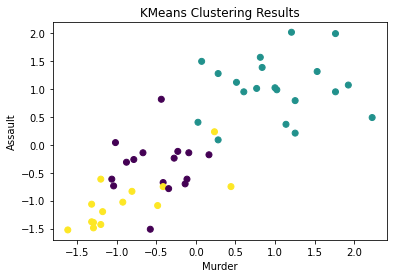

In [44]:
# Visualize KMeans clustering results
plt.scatter(crime_data_scaled[:, 0], crime_data_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering Results")
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.show()


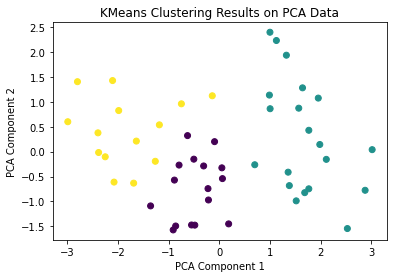

In [45]:
# Visualize KMeans clustering on PCA data results
plt.scatter(crime_data_pca[:, 0], crime_data_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title("KMeans Clustering Results on PCA Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

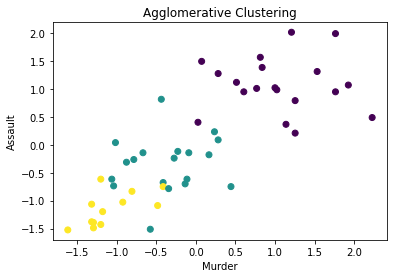

In [46]:
# Visualize Agglomerative clustering results
plt.scatter(crime_data_scaled[:, 0], crime_data_scaled[:, 1], c=labels_agglo)
plt.title('Agglomerative Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()